## Import necessary libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Define the model of the 2R Robot

In [2]:
def robot_model(x, t):
    g = 9.81
    l1 = 1.0
    l2 = 0.5
    m1 = 2.0
    m2 = 1.0
    I1 = 1e-2
    I2 = 5e-3
    D = 2.0

    # Define the state variables
    theta1, theta2, omega1, omega2 = x

    M = np.zeros((2, 2))
    M[0, 0] = m1 * (l1 / 2) ** 2 + m2 * (l1 ** 2 + (l2 / 2) ** 2) + m2 * l1 * l2 * np.cos(theta2) + I1 + I2
    M[0, 1] = m2 * (l2 / 2) ** 2 + 0.5 * m2 * l1 * l2 * np.cos(theta2) + I2
    M[1, 0] = M[0, 1]
    M[1, 1] = m2 * (l2 / 2) ** 2 + I2

    V = np.zeros((2, 1))
    V[0, 0] = -m2 * l1 * l2 * np.sin(theta2) * omega1 * omega2 - 0.5 * m2 * l1 * l2 * np.sin(theta2) * omega2 ** 2
    V[1, 0] = -0.5 * m2 * l1 * l2 * np.sin(theta2) * omega1 * omega2

    G = np.zeros((2, 1))
    G[0, 0] = (m1 * l1 / 2 + m2 * l1) * g * np.cos(theta1) + m2 * g * l2 / 2 * np.cos(theta1 + theta2)
    G[1, 0] = m2 * g * l2 / 2 * np.cos(theta1 + theta2)

    Q = np.zeros((2, 1))  # No input
    Q = Q - D * np.array([[omega1], [omega2]])

    xy = np.linalg.pinv(M) @ (Q - V - G)

    xp = np.zeros(4)
    xp[0] = omega1
    xp[1] = omega2
    xp[2] = xy[0, 0]
    xp[3] = xy[1, 0]

    return xp

## Initial conditions: [theta1, theta2, omega1, omega2]

In [3]:
x0 = [-np.pi/3, np.pi/3, 0, 0]  # Initial state

## Time vector for the simulation

In [4]:
tspan = np.linspace(0, 5, 500)  # From 0 to 5 seconds, 500 points

## Solve the system of ODEs

In [5]:
x = odeint(robot_model, x0, tspan)

## Plot state variables in degrees

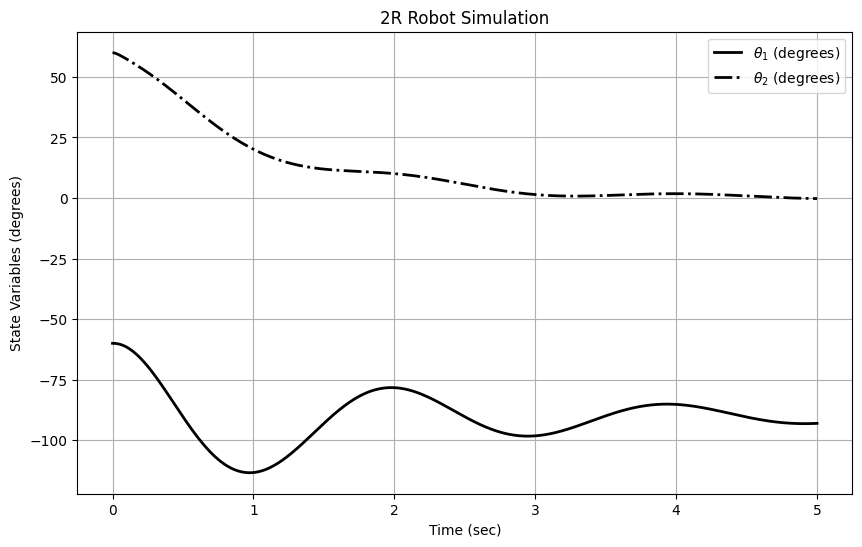

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tspan, np.degrees(x[:, 0]), 'k', linewidth=2, label=r'$\theta_1$ (degrees)')
plt.plot(tspan, np.degrees(x[:, 1]), '-.k', linewidth=2, label=r'$\theta_2$ (degrees)')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State Variables (degrees)')
plt.legend()
plt.title('2R Robot Simulation')
plt.show()